In [14]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = 'monatszahlen2405_verkehrsunfaelle_export_31_05_24_r.csv'
data = pd.read_csv(file_path)

# Display basic information and the first few rows of the data
data_info = data.info()
data_head = data.head()
data_unique_months = data['MONAT'].unique()  # Check unique values in 'MONAT' column

print(data_info)
print(data_head)
print(f"Unique months: {data_unique_months}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2254 entries, 0 to 2253
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   MONATSZAHL                      2254 non-null   object 
 1   AUSPRAEGUNG                     2254 non-null   object 
 2   JAHR                            2254 non-null   int64  
 3   MONAT                           2254 non-null   object 
 4   WERT                            2086 non-null   float64
 5   VORJAHRESWERT                   2086 non-null   float64
 6   VERAEND_VORMONAT_PROZENT        1924 non-null   float64
 7   VERAEND_VORJAHRESMONAT_PROZENT  2001 non-null   float64
 8   ZWOELF_MONATE_MITTELWERT        1932 non-null   float64
dtypes: float64(5), int64(1), object(3)
memory usage: 158.6+ KB
None
       MONATSZAHL AUSPRAEGUNG  JAHR   MONAT  WERT  VORJAHRESWERT  \
0  Alkoholunfälle   insgesamt  2024  202401   NaN            NaN   
1  Alkoholunfälle 

In [15]:
# Extracting year and month correctly from 'MONAT' and creating a new 'Date' column
data['Year'] = data['MONAT'].str[:4]  # Extract year from the first four characters
data['Month'] = data['MONAT'].str[4:]  # Extract month from the remaining characters

# Convert 'Year' and 'Month' to datetime
data['Date'] = pd.to_datetime(data['Year'] + '-' + data['Month'], format='%Y-%m', errors='coerce')

# Check for any invalid dates
invalid_dates = data[data['Date'].isna()]  # Identify any rows that couldn't be converted
print(f"Invalid dates found: {invalid_dates.shape[0]}")

Invalid dates found: 154


In [16]:
# Filter out rows with invalid 'Date' values (those where conversion to datetime failed)
cleaned_data = data[data['Date'].notna()]

# Remove rows where 'WERT' has NaN values
cleaned_data = cleaned_data.dropna(subset=['WERT'])
print(f"Rows after removing NaN in 'WERT': {cleaned_data.shape[0]}")

# Ensure 'Year' column is numeric for filtering
cleaned_data['Year'] = cleaned_data['Year'].astype(int)

# Remove rows where the year is greater than 2020
cleaned_data = cleaned_data[cleaned_data['Year'] <= 2020]
print(f"Rows after filtering years > 2020: {cleaned_data.shape[0]}")

# Verify the data cleaning step
cleaned_data_head = cleaned_data.head()
cleaned_data_summary = cleaned_data.describe()

print(cleaned_data_head)
print(cleaned_data_summary)

Rows after removing NaN in 'WERT': 1932
Rows after filtering years > 2020: 1764
        MONATSZAHL AUSPRAEGUNG  JAHR   MONAT  WERT  VORJAHRESWERT  \
51  Alkoholunfälle   insgesamt  2020  202001  28.0           22.0   
52  Alkoholunfälle   insgesamt  2020  202002  40.0           28.0   
53  Alkoholunfälle   insgesamt  2020  202003  27.0           34.0   
54  Alkoholunfälle   insgesamt  2020  202004  26.0           36.0   
55  Alkoholunfälle   insgesamt  2020  202005  40.0           39.0   

    VERAEND_VORMONAT_PROZENT  VERAEND_VORJAHRESMONAT_PROZENT  \
51                    -20.00                           27.27   
52                     42.86                           42.86   
53                    -32.50                          -20.59   
54                     -3.70                          -27.78   
55                     53.85                            2.56   

    ZWOELF_MONATE_MITTELWERT  Year Month       Date  
51                      37.0  2020    01 2020-01-01  
52          

/Users/ericborba/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ericborba/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


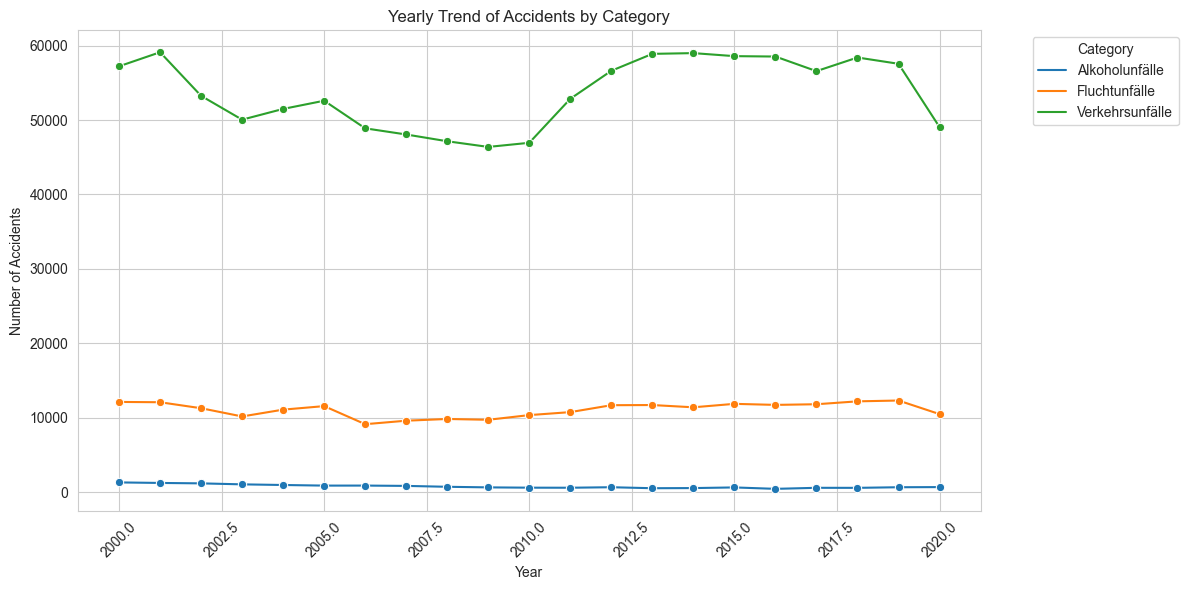

In [17]:
# Setting up the figure aesthetics
sns.set_style("whitegrid")

# Group data by year for accident counts by category
yearly_counts = cleaned_data.groupby(['JAHR', 'MONATSZAHL'])['WERT'].sum().reset_index()

# Plot yearly trends of accidents by category
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_counts, x='JAHR', y='WERT', hue='MONATSZAHL', marker='o')
plt.title('Yearly Trend of Accidents by Category')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

/Users/ericborba/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ericborba/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


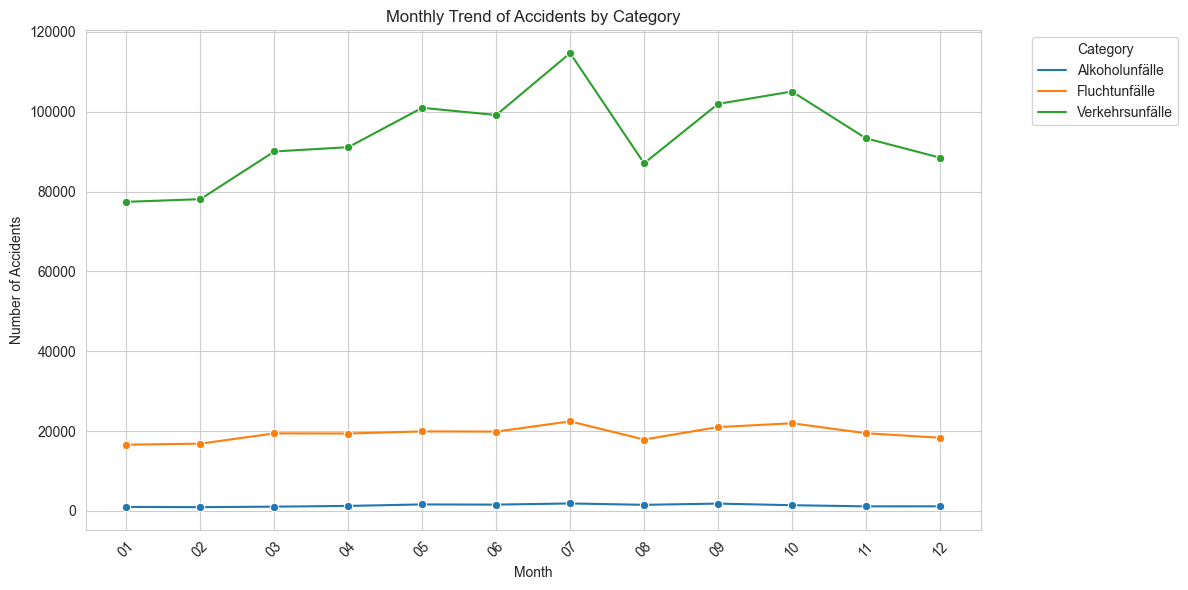

In [18]:
# Setting up the figure aesthetics
sns.set_style("whitegrid")

# Group data by month for accident counts by category
monthly_counts = cleaned_data.groupby(['Month', 'MONATSZAHL'])['WERT'].sum().reset_index()

# Plot monthly trends of accidents by category
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_counts, x='Month', y='WERT', hue='MONATSZAHL', marker='o')
plt.title('Monthly Trend of Accidents by Category')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Model Evaluation Results:
                      Model  Cross-Validation MSE      Test MSE    Test MAE  \
0         Linear Regression          1.015738e+06  9.456713e+05  700.591436   
1             Decision Tree          1.971647e+04  2.016927e+04   68.524079   
2             Random Forest          1.330047e+04  1.433634e+04   55.098045   
3  Support Vector Regressor          1.625286e+06  1.361034e+06  640.612217   

   R2 Score  
0  0.234872  
1  0.983681  
2  0.988401  
3 -0.101192  
Best Model: Random Forest


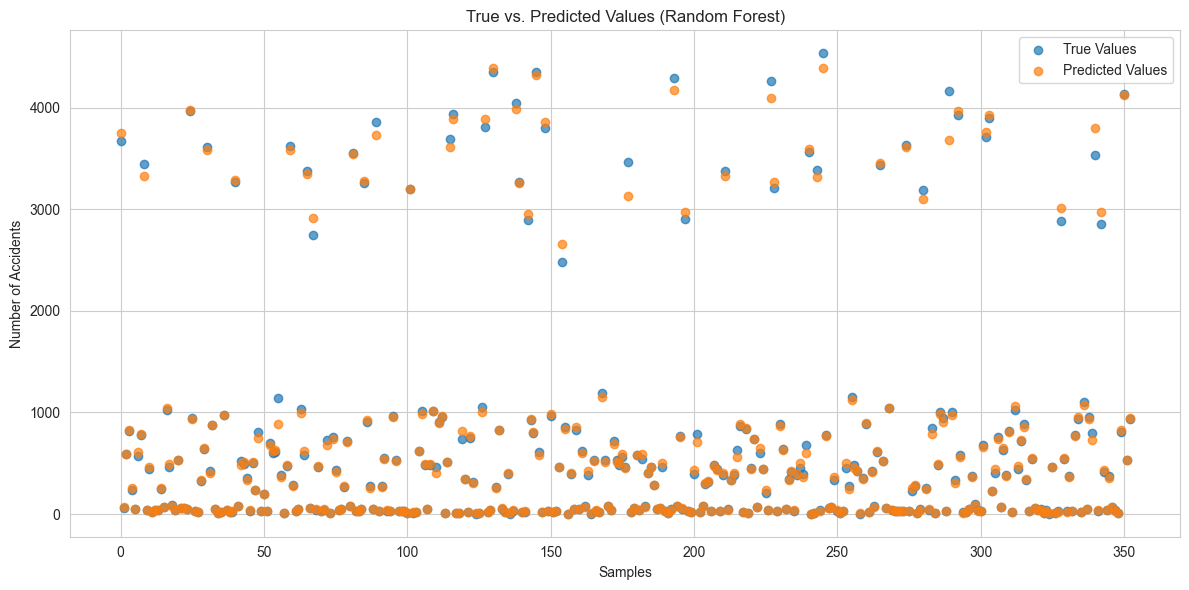

Predicted value for 2021-01 (Alkoholunfälle, insgesamt): 29.56


In [19]:
# Import necessary libraries for modeling
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Encode 'MONATSZAHL' (Category) and 'AUSPRAEGUNG' (Type)
category_encoder = LabelEncoder()
type_encoder = LabelEncoder()

cleaned_data['Category_Encoded'] = category_encoder.fit_transform(cleaned_data['MONATSZAHL'])
cleaned_data['Type_Encoded'] = type_encoder.fit_transform(cleaned_data['AUSPRAEGUNG'])

# Prepare features and target variable
X = cleaned_data[['JAHR', 'Month', 'Category_Encoded', 'Type_Encoded']].astype(int)
y = cleaned_data['WERT'].astype(float)  # Target: number of accidents

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models to evaluate
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Support Vector Regressor": SVR()
}

# Evaluate models and store results
evaluation_results = []

for model_name, model in models.items():
    # Perform cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    mean_cv_score = -np.mean(cv_scores)  # Convert negative MSE to positive
    
    # Train the model on the full training set and predict on test set
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store the results
    evaluation_results.append({
        "Model": model_name,
        "Cross-Validation MSE": mean_cv_score,
        "Test MSE": mse,
        "Test MAE": mae,
        "R2 Score": r2
    })

# Convert evaluation results to DataFrame for easy visualization
results_df = pd.DataFrame(evaluation_results)

# Display the results
print("Model Evaluation Results:")
print(results_df)

# Identify the best-performing model based on R2 score
best_model_name = results_df.loc[results_df['R2 Score'].idxmax()]['Model']
best_model = models[best_model_name]
print(f"Best Model: {best_model_name}")

# Train the best model on the full dataset
best_model.fit(X, y)

# Save the best model for deployment
import joblib
joblib.dump(best_model, 'best_accident_forecast_model.pkl')

# Visualization of model predictions vs. true values for the best model
y_best_pred = best_model.predict(X_test)

plt.figure(figsize=(12, 6))
plt.scatter(range(len(y_test)), y_test, label="True Values", alpha=0.7)
plt.scatter(range(len(y_best_pred)), y_best_pred, label="Predicted Values", alpha=0.7)
plt.title(f"True vs. Predicted Values ({best_model_name})")
plt.xlabel("Samples")
plt.ylabel("Number of Accidents")
plt.legend()
plt.tight_layout()
plt.show()

# Example prediction with the best model
example_data = pd.DataFrame({
    'JAHR': [2021],  # Example Year
    'Month': [1],    # Example Month
    'Category_Encoded': [category_encoder.transform(['Alkoholunfälle'])[0]],
    'Type_Encoded': [type_encoder.transform(['insgesamt'])[0]]
})
example_prediction = best_model.predict(example_data)
print(f"Predicted value for 2021-01 (Alkoholunfälle, insgesamt): {example_prediction[0]:.2f}")

